In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_columns = 100
import time
from collections import defaultdict

In [2]:
import pandas as pd
import numpy as np
from collections import defaultdict, namedtuple
from itertools import chain,combinations
import itertools
import time


In [73]:
%run "Final Project.ipynb"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
encounter_id                101766 non-null object
patient_nbr                 101766 non-null object
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
admission_type_id           101766 non-null object
discharge_disposition_id    101766 non-null object
admission_source_id         101766 non-null object
time_in_hospital            101766 non-null object
num_lab_procedures          101766 non-null object
num_procedures              101766 non-null object
num_medications             101766 non-null object
number_outpatient           101766 non-null object
number_emergency            101766 non-null object
number_inpatient            101766 non-null object
number_diagnoses            101766 non-null object
max_glu_serum               101766 non-null object
A1Cresult             

Encoded values for number_inpatient
Encoded values for discharge_disposition_id
Encoded values for encounter_id
Encoded values for change
Encoded values for gender
Encoded values for age
Encoded values for examide
Encoded values for nateglinide
Encoded values for tolazamide
Encoded values for race
Encoded values for number_outpatient
Encoded values for insulin
Encoded values for number_emergency
Encoded values for num_procedures
Encoded values for admission_type_id
47.8414674091
48.3033082214


In [4]:
dataset.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_new,diag_2_new,diag_3_new
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1,0,8,8
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1,8,0,7
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,1,8,0,8
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1,7,0,1
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,1,7,7,0


In [5]:
X = dataset.drop('readmitted', axis = 1)
y = dataset['readmitted']

### Case 1: Training using data concerning A1C

In [6]:
dataset.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_new,diag_2_new,diag_3_new
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1,0,8,8
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1,8,0,7
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,1,8,0,8
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1,7,0,1
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,1,7,7,0


In [7]:
##. 

In [225]:
## Remove patients without diabetes diagnoses
diab = dataset[(dataset['diag_1_new'] == 0) | (dataset['diag_2_new'] == 0) | (dataset['diag_3_new'] == 0)]
#dataset[dataset['diag_2_new'] == 0 && dataset['diag_2_new'] != 0]
#dataset[dataset['diag_3_new'] == 0 && (dataset['diag_1_new'] == 0 && dataset['diag_2_new'] != 0)]

In [224]:
dataset[(dataset['diag_1_new'] == 0) | (dataset['diag_2_new'] == 0) | (dataset['diag_3_new'] == 0)]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_new,diag_2_new,diag_3_new
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,8,8
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,8,0,7
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,8,0,8
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,7,0,1
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,7,7,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,1,1,0
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,73,0,12,0,0,0,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30,1,2,0
10,28236,89869032,AfricanAmerican,Female,[40-50),1,1,7,9,47,2,17,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,0,1,4
12,40926,85504905,Caucasian,Female,[40-50),1,3,7,7,60,0,15,0,1,0,8,None,None,Steady,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,<30,1,0,0
17,84222,108662661,Caucasian,Female,[50-60),1,1,7,3,29,0,11,0,0,0,3,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,7,7,0


In [228]:
# remove patients who expired
diab =  diab[(diab['discharge_disposition_id'] != 19) | (diab['discharge_disposition_id'] != 11) | (diab['discharge_disposition_id'] != 21) |\
            (diab['discharge_disposition_id'] != 20)]

In [230]:
## Drop duplicate values on the patient number
diab = diab.drop_duplicates('patient_nbr')

In [ ]:
diab[(diab['discharge_disposition_id'] != 19) | (diab['discharge_disposition_id'] != 11) | (diab['discharge_disposition_id'] != 21) |\
            (diab['discharge_disposition_id'] != 20)]

In [231]:
diab.shape

(31188, 47)

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import StratifiedKFold

In [13]:
for i,j in dict(X.dtypes).items():
    if str(j) == 'object':
        X[i] = le.fit_transform(X[i])
        print ('Encoded values for %s' %i)

Encoded values for diabetesMed
Encoded values for chlorpropamide
Encoded values for patient_nbr
Encoded values for repaglinide
Encoded values for number_diagnoses
Encoded values for num_medications
Encoded values for rosiglitazone
Encoded values for miglitol
Encoded values for glipizide
Encoded values for acetohexamide
Encoded values for citoglipton
Encoded values for admission_source_id
Encoded values for num_lab_procedures
Encoded values for glipizide-metformin
Encoded values for glyburide
Encoded values for metformin
Encoded values for tolbutamide
Encoded values for pioglitazone
Encoded values for glimepiride-pioglitazone
Encoded values for glimepiride
Encoded values for glyburide-metformin
Encoded values for A1Cresult
Encoded values for time_in_hospital
Encoded values for troglitazone
Encoded values for metformin-rosiglitazone
Encoded values for max_glu_serum
Encoded values for acarbose
Encoded values for metformin-pioglitazone
Encoded values for number_inpatient
Encoded values for

In [14]:
kfold = StratifiedKFold(y, n_folds=10, random_state=1)

In [15]:
clf = DecisionTreeClassifier(max_depth=7, max_features=3)

In [16]:
scores = []
for k, (train, test) in enumerate(kfold):
    clf.fit(X.loc[train], y.loc[train])
    score = clf.score(X.loc[test], y.loc[test])
    scores.append(score)
    print('Fold %s: Accuracy = %s' % ((k+1), score*100))

Fold 1: Accuracy = 88.8277488454
Fold 2: Accuracy = 88.7982706102
Fold 3: Accuracy = 87.6780976712
Fold 4: Accuracy = 87.9630539452
Fold 5: Accuracy = 88.8277488454
Fold 6: Accuracy = 88.8277488454
Fold 7: Accuracy = 88.8080966886
Fold 8: Accuracy = 88.8364779874
Fold 9: Accuracy = 88.8168238994
Fold 10: Accuracy = 88.8452088452


In [17]:
np.mean(scores), np.std(scores)

(0.88622927618350966, 0.0040640291827882544)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
randf = RandomForestClassifier(n_estimators=300, n_jobs=-1, max_depth=7)

In [20]:
scores = []
for k, (train, test) in enumerate(kfold):
    randf.fit(X.loc[train], y.loc[train])
    score = randf.score(X.loc[test], y.loc[test])
    scores.append(score)
    print('Fold %s: Accuracy = %s' % ((k+1), score))

Fold 1: Accuracy = 0.888375749238
Fold 2: Accuracy = 0.888375749238
Fold 3: Accuracy = 0.888375749238
Fold 4: Accuracy = 0.888375749238
Fold 5: Accuracy = 0.888375749238
Fold 6: Accuracy = 0.888375749238
Fold 7: Accuracy = 0.888375749238
Fold 8: Accuracy = 0.888463050314
Fold 9: Accuracy = 0.888463050314
Fold 10: Accuracy = 0.888452088452


In [21]:
X = dataset.drop(['readmitted', 'A1Cresult'], axis = 1)
y = dataset['readmitted']

In [22]:
for i,j in dict(X.dtypes).items():
    if str(j) == 'object':
        X[i] = le.fit_transform(X[i])
        print ('Encoded values for %s' %i)

Encoded values for diabetesMed
Encoded values for chlorpropamide
Encoded values for patient_nbr
Encoded values for repaglinide
Encoded values for number_diagnoses
Encoded values for num_medications
Encoded values for rosiglitazone
Encoded values for miglitol
Encoded values for glipizide
Encoded values for acetohexamide
Encoded values for citoglipton
Encoded values for admission_source_id
Encoded values for num_lab_procedures
Encoded values for glipizide-metformin
Encoded values for glyburide
Encoded values for metformin
Encoded values for pioglitazone
Encoded values for glimepiride-pioglitazone
Encoded values for glimepiride
Encoded values for glyburide-metformin
Encoded values for tolbutamide
Encoded values for time_in_hospital
Encoded values for troglitazone
Encoded values for metformin-rosiglitazone
Encoded values for max_glu_serum
Encoded values for acarbose
Encoded values for metformin-pioglitazone
Encoded values for number_inpatient
Encoded values for discharge_disposition_id
Enc

In [23]:
kfold = StratifiedKFold(y, n_folds=10, random_state=1)

In [24]:
clf2 = DecisionTreeClassifier(max_depth=7, max_features=3)

In [25]:
'''
scores2 = []
for k, (train, test) in enumerate(kfold):
    clf2.fit(X.loc[train], y.loc[train])
    score = randf.score(X.loc[test], y.loc[test])
    scores2.append(score)
    print('Fold %s: Accuracy = %s' % ((k+1), score*100))

ValueError: Number of features of the model must match the input. Model n_features is 46 and input n_features is 45 

In [ ]:
scores2

In [26]:
dataset.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_new,diag_2_new,diag_3_new
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1,0,8,8
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1,8,0,7
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,1,8,0,8
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1,7,0,1
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,1,7,7,0


In [166]:
import numpy as np
import pandas as pd

def gettransactionset(data):
    tranlist = []
    for i in data.index:
        itemset = []
        for k,v in dict(data.loc[i]).items():
            if isinstance(v, str) or not np.isnan(v): #Handle missing values
                itemset.append(k + ' - ' + str(v))
        tranlist.append(frozenset(itemset))
    return tranlist



def frequent1itemset(transactions, minsup):
    '''
    transactions: list of transaction set
    minsup: absolute minimum support count
    
    returns list one itemsets as well as a dictionary one itemsets with support counts.
    '''
    count = len(transactions)
    oneitems = defaultdict(int)
    oneitemsupport = set()
    
    for transaction in transactions:
        for item in transaction:
            oneitems[item] += 1
            
    for k, v in oneitems.items():
        if v >= (minsup * count):
            oneitemsupport.add(frozenset([k]))
        #else:
        #    del oneitems[k]
            
    return oneitemsupport, oneitems


def selfjoin(prevfreqset, targetlength):
    '''
    This function performs a self joining to determine the K itemset
    prevfreqset: frequent K - 1 itemset
    targetlength: The K value i.e the length of the frequent items
    returns a set of items.
    '''
    #return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == targetlength])
    return set([i.union(j) for i in prevfreqset for j in prevfreqset if len(i.union(j)) == targetlength])

def hasinfrequentsubset(freqitems, previousL):
    '''
    ***Checks if any of the joined frequent items is infrequent.
    freqitems: an item set
    previousL: previous list of frequent itemset.
    returns a boolean value corresponding if the itemset has infrequent subset
    
    '''
    for i in freqitems:
        #seti = set([i])
        if previousL.issuperset([i]):
            return False
    return True


def getfrequentitemsfromL(L, transactions, minsupport):
    '''
    Scans transactions to determine itemsets which are frequent.
    L: List of frequent itemsets
    transactions: list of transactions
    minsupport: absolute minimum support
    
    returns set of frequent itemsets as well as a dictionary frequent items and a support count.
    '''
    
    freqitems = set()
    #itemcounts = set()
    itemcount = defaultdict(int)
    for i in L:
        #itemcount = defaultdict(int)
        for itemset in transactions:
            if i.issubset(itemset):
                itemcount[i] += 1
        if itemcount[i] / len(transactions) >= minsupport:
            freqitems.add(i)
        #else:
        #    del itemcount[i]
    
    return freqitems, itemcount

def generatefrequentitemsApriori(transactions, minsupport):
    '''
    Runs full process to get all frequent itemsets.
    transactions: full list of all transactions
    minsupport: absolute minimum support
    
    returns a set of frequent itemsets and set of dictionary of frequent itemset and each support count.
    '''
    
    #starttime = time.time()
    #Get frequent 1-Item sets
    K = 1
    #L1 = frequent1itemset(transactions, minsupport)
    Fulllist = set([])
    CurrentSet, Fulldict = frequent1itemset(transactions, minsupport)
    Lkprev = set()
    K += 1
    while CurrentSet != set([]):
        #print('Loop %i, %i'%(K, len(Fulllist)))
        Lkprev.union(CurrentSet)
        CurrentSet = selfjoin(CurrentSet, K)
    #Using Apriori rule
        inf = set()
        for i in CurrentSet:
            if hasinfrequentsubset(i, Lkprev):
                inf.add(i)
        CurrentSet.discard(inf)
    #Scan transaction list for minimum support
        CurrentSet, CurrentD = getfrequentitemsfromL(CurrentSet, transactions, minsupport)
        Fulllist = Fulllist.union(CurrentSet)
        Fulldict.update(CurrentD)
        K += 1
        
    return Fulllist, Fulldict#, time.time() - starttime


def subsets(myset):
    """ Returns non empty subsets of arr"""
    cs = chain(*[combinations(myset, i + 1) for i, a in enumerate(myset)])
    return map(frozenset, [x for x in cs])
def getffrequentassociations(frequentset, frequentsetcounters, minconf, numoftrans):
    '''
    frequentset: Set of frequent items from which rules are to be obtained.
    frequentsetcounters: Set of frequent items with their support count.
    minconf: minumum confidence which must hold for a rule to be frequent.
    numoftrans: number of transactions which is being mined.
    '''
    def getsupport(item):
        '''
        item: Item in frequent itemset whose minimums support is to be determined.
        Returns float value of support value.
        '''
        #if len(item) == 1:
        #    item = frozenset([list(item)[0]])
        try:
            result = float(frequentsetcounters[item])/numoftrans
        except:
            print 'error obtained for item' + str(item)
            result = 0
        return result #float(frequentsetcounters[item])/numoftrans
    
    frequentrules = []
    for freqitem in frequentset:
        #Get Subsets for frequent item
        subs = subsets(freqitem)
        for element in subs:
            rem = freqitem.difference(element)
            if len(rem) > 0:
                conf = getsupport(freqitem)/getsupport(element)
                support = getsupport(freqitem)
                lift = conf/getsupport(frozenset(rem))
                if conf >= minconf:
                    frequentrules.append(((tuple(element), tuple(rem)),conf,support,lift))    
    #return sorted(frequentrules, reverse=True, key = lambda rule, conf, sup: sup)
    return frequentrules
## Frequent Itemset Miner for Apriori Algorithms...

def associationruleminer(transaction, minsup, minconf):
    '''
    transaction: The list of transactions to be mined in pandas dataframe
    minsupport: The absolute minimum support
    minconf: The absolute value of the minimum confidence
    '''
    import time
    start_time = time.time()
    #Convert transaction dataframe into a set of items.
    transactions = gettransactionset(transaction)
    
    #Get frequent itemsets and itemset support count
    itemset, itemsetsupport, t = generatefrequentitemsApriori(transactions, minsup)
    
    #Mine association rules from frequent itemsets
    assocrules = getffrequentassociations(itemset, itemsetsupport, minconf=minconf, numoftrans=len(transactions))
    
    #print out association rules
    
    for i, rule in enumerate(assocrules):
        print('Rule %i: %s => %s - support: %0.2f, confidence: %0.2f' %(i, rule[0][0], rule[0][1], rule[2], rule[1]))
        
    return assocrules#(time.time() - start_time)

In [28]:
diab.columns

Index([u'encounter_id', u'patient_nbr', u'race', u'gender', u'age',
       u'admission_type_id', u'discharge_disposition_id',
       u'admission_source_id', u'time_in_hospital', u'num_lab_procedures',
       u'num_procedures', u'num_medications', u'number_outpatient',
       u'number_emergency', u'number_inpatient', u'number_diagnoses',
       u'max_glu_serum', u'A1Cresult', u'metformin', u'repaglinide',
       u'nateglinide', u'chlorpropamide', u'glimepiride', u'acetohexamide',
       u'glipizide', u'glyburide', u'tolbutamide', u'pioglitazone',
       u'rosiglitazone', u'acarbose', u'miglitol', u'troglitazone',
       u'tolazamide', u'examide', u'citoglipton', u'insulin',
       u'glyburide-metformin', u'glipizide-metformin',
       u'glimepiride-pioglitazone', u'metformin-rosiglitazone',
       u'metformin-pioglitazone', u'change', u'diabetesMed', u'readmitted',
       u'diag_1_new', u'diag_2_new', u'diag_3_new'],
      dtype='object')

In [29]:
[u'race', u'gender', u'age', u'metformin', u'repaglinide', u'nateglinide',
       u'chlorpropamide', u'glimepiride', u'acetohexamide', u'glipizide',
       u'glyburide', u'tolbutamide', u'pioglitazone', u'rosiglitazone',
       u'acarbose', u'miglitol', u'troglitazone', u'tolazamide', u'examide',
       u'citoglipton', u'insulin', u'glyburide-metformin',
       u'glipizide-metformin', u'glimepiride-pioglitazone',
       u'metformin-rosiglitazone', u'metformin-pioglitazone', u'readmitted']

[u'race',
 u'gender',
 u'age',
 u'metformin',
 u'repaglinide',
 u'nateglinide',
 u'chlorpropamide',
 u'glimepiride',
 u'acetohexamide',
 u'glipizide',
 u'glyburide',
 u'tolbutamide',
 u'pioglitazone',
 u'rosiglitazone',
 u'acarbose',
 u'miglitol',
 u'troglitazone',
 u'tolazamide',
 u'examide',
 u'citoglipton',
 u'insulin',
 u'glyburide-metformin',
 u'glipizide-metformin',
 u'glimepiride-pioglitazone',
 u'metformin-rosiglitazone',
 u'metformin-pioglitazone',
 u'readmitted']

In [78]:
assoc_diab =  diab[[u'race', u'gender', u'age', u'metformin', u'repaglinide', u'nateglinide',
       u'chlorpropamide', u'glimepiride', u'acetohexamide', u'glipizide',
       u'glyburide', u'tolbutamide', u'pioglitazone', u'rosiglitazone',
       u'acarbose', u'miglitol', u'troglitazone', u'tolazamide', u'examide',
       u'citoglipton', u'insulin', u'glyburide-metformin',
       u'glipizide-metformin', u'glimepiride-pioglitazone',
       u'metformin-rosiglitazone', u'metformin-pioglitazone', u'readmitted']][diab['diabetesMed'] == 'Yes']

In [79]:
assoc_diab.shape

(24884, 27)

In [80]:
assoc_diab = assoc_diab.replace('No', np.nan)

In [81]:
assoc_diab.head()

,race,gender,age,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,readmitted
1,Caucasian,Female,[10-20),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up,NaN,NaN,NaN,NaN,NaN,>30
2,AfricanAmerican,Female,[20-30),NaN,NaN,NaN,NaN,NaN,NaN,Steady,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
3,Caucasian,Male,[30-40),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up,NaN,NaN,NaN,NaN,NaN,NO
4,Caucasian,Male,[40-50),NaN,NaN,NaN,NaN,NaN,NaN,Steady,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Steady,NaN,NaN,NaN,NaN,NaN,NO
5,Caucasian,Male,[50-60),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Steady,NaN,NaN,NaN,NaN,NaN,>30


In [34]:
#associationruleminer(assoc_diab, 0.01, 0.6)

In [35]:
#diab.diabetesMed.value_counts()

In [36]:
#a = gettransactionset(assoc_diab)

In [167]:
#a

In [ ]:
#s,t = generatefrequentitemsApriori(gettransactionset(assoc_diab), 0.00000001)

In [ ]:
#t

In [ ]:
#len(a)

In [ ]:
#s,t =  frequent1itemset(gettransactionset(assoc_diab), 0.01)

In [232]:
#t
assoc_diab.shape

(24884, 27)

In [38]:
class FPNode(object):
    '''
    Implements a node of the FP tree
    '''

    def __init__(self, value, count, parent):
        """
        Initializes the node.
        """
        self.value = value
        self.count = count
        self.parent = parent
        self.link = None
        self.children = []

    def has_child(self, value):
        """
        Checks if the node has children
        """
        for node in self.children:
            if node.value == value:
                return True

        return False

    def get_child(self, value):
        """
        Return a child node with a particular value.
        """
        for node in self.children:
            if node.value == value:
                return node

        return None

    def add_child(self, value):
        """
        Add a node as a child node.
        """
        child = FPNode(value, 1, self)
        self.children.append(child)
        return child


class FPTree(object):
    """
    A frequent pattern tree.
    """

    def __init__(self, transactions, threshold, root_value, root_count):
        """
        Initialize the tree.
        """
        self.frequent = self.find_frequent_items(transactions, threshold)
        self.headers = self.build_header_table(self.frequent)
        self.root = self.build_fptree(
            transactions, root_value,
            root_count, self.frequent, self.headers)

    @staticmethod
    def find_frequent_items(transactions, threshold):
        """
        Create a dictionary of items with occurrences above the threshold.
        """
        items = {}

        for transaction in transactions:
            for item in transaction:
                if item in items:
                    items[item] += 1
                else:
                    items[item] = 1

        for key in list(items.keys()):
            if items[key] < threshold:
                del items[key]

        return items

    @staticmethod
    def build_header_table(frequent):
        """
        Build the header table.
        """
        headers = {}
        for key in frequent.keys():
            headers[key] = None

        return headers

    def build_fptree(self, transactions, root_value,
                     root_count, frequent, headers):
        """
        Build the FP tree and return the root node.
        """
        root = FPNode(root_value, root_count, None)

        for transaction in transactions:
            sorted_items = [x for x in transaction if x in frequent]
            sorted_items.sort(key=lambda x: frequent[x], reverse=True)
            if len(sorted_items) > 0:
                self.insert_tree(sorted_items, root, headers)

        return root

    def insert_tree(self, items, node, headers):
        """
        Recursively grow FP tree.
        """
        first = items[0]
        child = node.get_child(first)
        if child is not None:
            child.count += 1
        else:
            # Add new child.
            child = node.add_child(first)

            # Link it to header structure.
            if headers[first] is None:
                headers[first] = child
            else:
                current = headers[first]
                while current.link is not None:
                    current = current.link
                current.link = child

        # Call function recursively.
        remaining_items = items[1:]
        if len(remaining_items) > 0:
            self.insert_tree(remaining_items, child, headers)

    def tree_has_single_path(self, node):
        """
        If there is a single path in the tree,
        return True, else return False.
        """
        num_children = len(node.children)
        if num_children > 1:
            return False
        elif num_children == 0:
            return True
        else:
            return True and self.tree_has_single_path(node.children[0])

    def mine_patterns(self, threshold):
        """
        Mine the constructed FP tree for frequent patterns.
        """
        if self.tree_has_single_path(self.root):
            return self.generate_pattern_list()
        else:
            return self.zip_patterns(self.mine_sub_trees(threshold))

    def zip_patterns(self, patterns):
        """
        Append suffix to patterns in dictionary if
        we are in a conditional FP tree.
        """
        suffix = self.root.value

        if suffix is not None:
            # We are in a conditional tree.
            new_patterns = {}
            for key in patterns.keys():
                new_patterns[tuple(sorted(list(key) + [suffix]))] = patterns[key]

            return new_patterns

        return patterns

    def generate_pattern_list(self):
        """
        Generate a list of patterns with support counts.
        """
        patterns = {}
        items = self.frequent.keys()

        # If we are in a conditional tree,
        # the suffix is a pattern on its own.
        if self.root.value is None:
            suffix_value = []
        else:
            suffix_value = [self.root.value]
            patterns[tuple(suffix_value)] = self.root.count

        for i in range(1, len(items) + 1):
            for subset in itertools.combinations(items, i):
                pattern = tuple(sorted(list(subset) + suffix_value))
                patterns[pattern] = \
                    min([self.frequent[x] for x in subset])

        return patterns

    def mine_sub_trees(self, threshold):
        """
        Generate subtrees and mine them for patterns.
        """
        patterns = {}
        mining_order = sorted(self.frequent.keys(),
                              key=lambda x: self.frequent[x])

        # Get items in tree in reverse order of occurrences.
        for item in mining_order:
            suffixes = []
            conditional_tree_input = []
            node = self.headers[item]

            # Follow node links to get a list of
            # all occurrences of a certain item.
            while node is not None:
                suffixes.append(node)
                node = node.link

            # For each occurrence of the item, 
            # trace the path back to the root node.
            for suffix in suffixes:
                frequency = suffix.count
                path = []
                parent = suffix.parent

                while parent.parent is not None:
                    path.append(parent.value)
                    parent = parent.parent

                for i in range(frequency):
                    conditional_tree_input.append(path)

            # Now we have the input for a subtree,
            # so construct it and grab the patterns.
            subtree = FPTree(conditional_tree_input, threshold,
                             item, self.frequent[item])
            subtree_patterns = subtree.mine_patterns(threshold)

            # Insert subtree patterns into main patterns dictionary.
            for pattern in subtree_patterns.keys():
                if pattern in patterns:
                    patterns[pattern] += subtree_patterns[pattern]
                else:
                    patterns[pattern] = subtree_patterns[pattern]

        return patterns


def find_frequent_patterns(transactions, min_sup):
    """
    Transactions: As a list of transaction sets
    min_sup: Absolute minimum support 
    """
    
    starttime = time.time()
    support_threshold =  min_sup * len(transactions)
    tree = FPTree(transactions, support_threshold, None, None)
    
    result = tree.mine_patterns(support_threshold)
    freqitems = set([])
    resultdict = {}
    for itemset, values in result.items():
        freqitems.add(frozenset(itemset))
        resultdict[freqitems.add(frozenset(itemset))] = values
        
    return freqitems, resultdict#, time.time() - starttime

In [168]:
## Using a minimum support of 1%
import itertools
s,t = find_frequent_patterns(gettransactionset(assoc_diab), 0.001)

In [83]:
demographics = gettransactionset(diab[['gender', 'age', 'race']])

In [84]:
l = []
for i in demographics:
    for j in i:
        l.append(j)
demographics = set(l)

In [85]:
readmit = set(['readmitted - ' + str(i) for i in pd.unique(assoc_diab['readmitted'])])

In [86]:
drugs = gettransactionset(assoc_diab.drop(['gender', 'age', 'race', 'readmitted'], axis = 1))
l = []
for i in drugs:
    for j in i:
        l.append(j)
drugs = set(l)
        

In [87]:
len(drugs)

42

In [107]:
len(s)

700

In [108]:
#type(s)

set

In [104]:
## Get the rules which can be considered:
List = []
for i in s:    
    if i.intersection(demographics) != set([]):
        if i.intersection(drugs) != set({}):
            if i.intersection(readmit) != set({}):
                List.append(i)

In [48]:
set(List)

{frozenset({'age - [60-70)', 'insulin - Up', 'readmitted - 1'}),
 frozenset({'glimepiride - Steady',
            'race - AfricanAmerican',
            'readmitted - 1'}),
 frozenset({'gender - Female',
            'glipizide - Steady',
            'metformin - Steady',
            'readmitted - 1'}),
 frozenset({'insulin - Steady',
            'race - Caucasian',
            'readmitted - 1',
            'rosiglitazone - Steady'}),
 frozenset({'age - [80-90)',
            'gender - Male',
            'insulin - Steady',
            'readmitted - 1'}),
 frozenset({'age - [70-80)',
            'gender - Female',
            'insulin - Up',
            'readmitted - 1'}),
 frozenset({'age - [70-80)',
            'gender - Female',
            'glyburide - Steady',
            'readmitted - 1'}),
 frozenset({'gender - Female',
            'insulin - Down',
            'race - AfricanAmerican',
            'readmitted - 1'}),
 frozenset({'gender - Female', 'metformin - Steady', 'readmitted 

In [89]:
transactionset = gettransactionset(assoc_diab)

In [169]:
ll = []
for i in list(s):
    ll = ll + subsets(i)
    
ll = set(ll)

In [110]:
ll

{frozenset({'repaglinide - Steady'}),
 frozenset({'gender - Male', 'insulin - Steady', 'rosiglitazone - Steady'}),
 frozenset({'glimepiride - Steady', 'race - AfricanAmerican'}),
 frozenset({'age - [60-70)', 'insulin - Up'}),
 frozenset({'gender - Female', 'readmitted - <30'}),
 frozenset({'age - [60-70)',
            'gender - Male',
            'metformin - Steady',
            'race - Caucasian',
            'readmitted - NO'}),
 frozenset({'age - [70-80)', 'gender - Female', 'glipizide - Steady'}),
 frozenset({'age - [70-80)', 'glimepiride - Steady'}),
 frozenset({'age - [70-80)', 'gender - Female', 'race - AfricanAmerican'}),
 frozenset({'gender - Female', 'glyburide - Steady', 'metformin - Steady'}),
 frozenset({'gender - Male',
            'glyburide - Steady',
            'race - Caucasian',
            'readmitted - >30'}),
 frozenset({'pioglitazone - Steady'}),
 frozenset({'age - [50-60)', 'gender - Female', 'readmitted - >30'}),
 frozenset({'age - [40-50)', 'race - Caucasian

In [170]:
trandict = defaultdict(int)
for i in ll:
    for transaction in transactionset:
        if i.issubset(transaction):
            trandict[i] += 1

In [171]:
trandict = dict(trandict)

In [97]:
for k,v in sorted(trandict.items(), key= lambda x: x[1]):
    print str(k) + ':' + str(v)

frozenset(['gender - Male', 'readmitted - NO', 'insulin - Steady', 'age - [40-50)', 'race - Caucasian']):249
frozenset(['glyburide - Steady', 'insulin - Steady', 'readmitted - NO', 'gender - Female']):249
frozenset(['insulin - Steady', 'glipizide - Steady', 'race - Caucasian', 'readmitted - >30']):250
frozenset(['metformin - Steady', 'age - [60-70)', 'readmitted - NO', 'insulin - Steady', 'race - Caucasian']):252
frozenset(['insulin - Up', 'readmitted - <30', 'race - Caucasian']):253
frozenset(['age - [60-70)', 'insulin - Up', 'readmitted - >30']):253
frozenset(['metformin - Steady', 'age - [60-70)', 'readmitted - >30', 'gender - Female']):254
frozenset(['age - [60-70)', 'readmitted - NO', 'insulin - Steady', 'race - AfricanAmerican']):255
frozenset(['insulin - Down', 'readmitted - <30', 'gender - Female']):256
frozenset(['gender - Male', 'glyburide - Steady', 'insulin - Steady', 'readmitted - NO']):257
frozenset(['gender - Male', 'insulin - Steady', 'race - AfricanAmerican', 'readmitt

In [172]:
SSS = getffrequentassociations(s, trandict, 0.5, len(assoc_diab))

In [54]:
for i, rule in enumerate(SSS):
        print('Rule %i: %s => %s - support: %0.2f, confidence: %0.2f' %(i, rule[0][0], rule[0][1], rule[2], rule[1]))

Rule 0: ('metformin - Steady', 'glipizide - Steady') => ('gender - Female', 'readmitted - 1') - support: 0.02, confidence: 0.46
Rule 1: ('metformin - Steady', 'glipizide - Steady', 'gender - Female') => ('readmitted - 1',) - support: 0.02, confidence: 0.93
Rule 2: ('metformin - Steady', 'glipizide - Steady', 'readmitted - 1') => ('gender - Female',) - support: 0.02, confidence: 0.50
Rule 3: ('glipizide - Steady', 'gender - Female', 'readmitted - 1') => ('metformin - Steady',) - support: 0.02, confidence: 0.32
Rule 4: ('age - [70-80)', 'insulin - Steady') => ('gender - Female', 'race - Caucasian', 'readmitted - 1') - support: 0.03, confidence: 0.36
Rule 5: ('age - [70-80)', 'insulin - Steady', 'gender - Female') => ('race - Caucasian', 'readmitted - 1') - support: 0.03, confidence: 0.63
Rule 6: ('age - [70-80)', 'insulin - Steady', 'race - Caucasian') => ('gender - Female', 'readmitted - 1') - support: 0.03, confidence: 0.48
Rule 7: ('age - [70-80)', 'insulin - Steady', 'readmitted - 1'

Rule 1606: ('age - [60-70)', 'glipizide - Steady', 'race - Caucasian', 'readmitted - 1') => ('gender - Female',) - support: 0.01, confidence: 0.45
Rule 1607: ('insulin - Down',) => ('gender - Male', 'readmitted - 1') - support: 0.07, confidence: 0.42
Rule 1608: ('gender - Male', 'insulin - Down') => ('readmitted - 1',) - support: 0.07, confidence: 0.90
Rule 1609: ('insulin - Down', 'readmitted - 1') => ('gender - Male',) - support: 0.07, confidence: 0.47
Rule 1610: ('age - [30-40)',) => ('insulin - Steady', 'readmitted - 1') - support: 0.02, confidence: 0.36
Rule 1611: ('age - [30-40)', 'insulin - Steady') => ('readmitted - 1',) - support: 0.02, confidence: 0.92
Rule 1612: ('age - [30-40)', 'readmitted - 1') => ('insulin - Steady',) - support: 0.02, confidence: 0.39
Rule 1613: ('glyburide - Steady', 'age - [50-60)') => ('race - Caucasian', 'readmitted - 1') - support: 0.01, confidence: 0.64
Rule 1614: ('glyburide - Steady', 'age - [50-60)', 'race - Caucasian') => ('readmitted - 1',) - 

In [138]:
def stratifyrules(rulelist):
    '''
    removes uninteresting rules based on the rules of thumb:
        1. Lift greater than 1
        2. Rule has a component for readmission, demographios and drugs applied
        
    returns: List of rules.
    '''
    rulesd = {}
    for rule in rulelist:
        if rule[3] > 1:
            if checkrule(set(rule[0][0])):
                if set(rule[0][1]).issubset(readmit):
                    rulesd[str(rule[0][0]) + '=>' + str(rule[0][1])] = [rule[1], rule[2], rule[3]]
    
    return rulesd

In [173]:
final = stratifyrules(SSS)

In [174]:
len(final)

931

In [158]:
#SSS

In [161]:
#s

In [175]:
result = pd.DataFrame(final, index=['Confidence', 'Support', 'Lift'])

In [176]:
result = result.T

In [181]:
result.sort_values('Confidence', ascending=False)

,Confidence,Support,Lift
"('metformin - Steady', 'race - Asian')=>('readmitted - NO',)",0.911111,0.001648,1.572812
"('age - [30-40)', 'glyburide - Steady', 'insulin - Steady')=>('readmitted - NO',)",0.866667,0.001045,1.496090
"('pioglitazone - Steady', 'insulin - Steady', 'race - Unknown')=>('readmitted - NO',)",0.862069,0.001005,1.488153
"('age - [30-40)', 'glyburide - Steady', 'gender - Female')=>('readmitted - NO',)",0.860465,0.001487,1.485384
"('gender - Male', 'age - [0-10)', 'insulin - Steady', 'race - Caucasian')=>('readmitted - NO',)",0.857143,0.001206,1.479649
"('age - [0-10)', 'insulin - Steady', 'race - Caucasian')=>('readmitted - NO',)",0.853659,0.002813,1.473634
"('age - [0-10)', 'insulin - Steady', 'gender - Female', 'race - Caucasian')=>('readmitted - NO',)",0.851064,0.001607,1.469155
"('age - [0-10)', 'insulin - Steady', 'gender - Female')=>('readmitted - NO',)",0.849057,0.001808,1.465690
"('age - [60-70)', 'glyburide - Steady', 'insulin - Steady', 'race - AfricanAmerican')=>('readmitted - NO',)",0.848485,0.001125,1.464703
"('age - [0-10)', 'insulin - Steady')=>('readmitted - NO',)",0.845361,0.003295,1.459310


In [192]:
r2 = result[result['Confidence'] > 0.8]

In [185]:
#result.to_csv('result3.csv')
assoc_diab.readmitted.value_counts()

NO     14415
>30     8152
<30     2317
Name: readmitted, dtype: int64

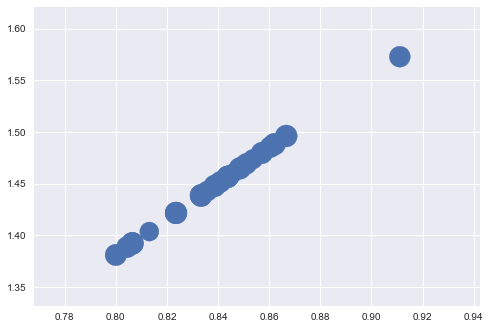

In [223]:
plt.scatter(r2['Confidence'], r2['Lift'], s = np.array(np.log(r2.Support.values) + 2 ) * -100, marker='o')
plt.show()

In [196]:
result.to_csv('result22.csv')

In [222]:
np.array(np.log(r2.Support.values) + 2 ) * -100

array([ 371.52610584,  431.53178159,  443.31008515,  387.34850636,
        451.1062393 ,  486.38837676,  478.97757955,  490.31044808,
        451.1062393 ,  472.0782924 ,  409.66286149,  486.38837676,
        465.62444028,  365.6072187 ,  482.61434396,  443.31008515,
        478.97757955,  478.97757955,  451.1062393 ,  490.31044808,
        490.31044808,  482.61434396,  420.99573002,  440.84082389,
        490.31044808,  490.31044808])

In [60]:
ll = ll +(subsets(frozenset({'gender - Female',
            'insulin - Up',
            'race - Caucasian',
            'readmitted - NO'})))

TypeError: unsupported operand type(s) for +: 'set' and 'list'

In [184]:
assoc_diab[assoc_diab['readmitted'] == '<30']

,race,gender,age,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,readmitted
12,Caucasian,Female,[40-50),Steady,Up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Down,NaN,NaN,NaN,NaN,NaN,<30
46,Caucasian,Female,[70-80),NaN,NaN,NaN,NaN,NaN,NaN,NaN,Steady,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Down,NaN,NaN,NaN,NaN,NaN,<30
77,Caucasian,Female,[60-70),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up,NaN,NaN,NaN,NaN,NaN,<30
114,Caucasian,Male,[70-80),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up,NaN,NaN,NaN,NaN,NaN,<30
136,Other,Female,[60-70),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up,NaN,NaN,NaN,NaN,NaN,<30
160,Caucasian,Male,[80-90),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Steady,NaN,NaN,NaN,NaN,NaN,<30
167,Caucasian,Female,[30-40),Steady,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Down,NaN,NaN,NaN,NaN,NaN,<30
197,AfricanAmerican,Female,[40-50),NaN,NaN,NaN,NaN,NaN,NaN,NaN,Steady,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up,NaN,NaN,NaN,NaN,NaN,<30
220,Caucasian,Male,[50-60),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up,NaN,NaN,NaN,NaN,NaN,<30
232,Caucasian,Male,[10-20),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Steady,NaN,NaN,NaN,NaN,NaN,<30


In [187]:
import plotly

ImportError: No module named plotly

In [ ]:
def getffrequentassociations(frequentset, frequentsetcounters, minconf, numoftrans):
    '''
    frequentset: Set of frequent items from which rules are to be obtained.
    frequentsetcounters: Set of frequent items with their support count.
    minconf: minumum confidence which must hold for a rule to be frequent.
    numoftrans: number of transactions which is being mined.
    '''
    def getsupport(item):
        '''
        item: Item in frequent itemset whose minimums support is to be determined.
        Returns float value of support value.
        '''
        #if len(item) == 1:
        #    item = frozenset([list(item)[0]])
        return float(frequentsetcounters[item])/numoftrans
    
    frequentrules = []
    for freqitem in frequentset:
        #Get Subsets for frequent item
        subs = subsets(freqitem)
        for element in subs:
            rem = freqitem.difference(element)
            if len(rem) > 0:
                if getsupport(element) == 0:
                    conf = 0
                    lift = 0
                else:
                    conf = getsupport(freqitem)/getsupport(element)
                    support = getsupport(freqitem)
                    if getsupport(frozenset(rem)) == 0:
                        lift = 0
                    else:
                        lift = conf/getsupport(frozenset(rem))
                if conf >= minconf:
                    frequentrules.append(((tuple(element), tuple(rem)),conf,support,lift))    
    #return sorted(frequentrules, reverse=True, key = lambda rule, conf, sup: sup)
    return frequentrules

In [61]:
def checkrule(i):
    if i.intersection(demographics) != set([]):
        if i.intersection(drugs) != set({}):
#            if i.intersection(readmit) != set({}):
                return True

In [62]:
trandict[frozenset(['readmitted - NO'])]

0

In [72]:
assoc_diab.readmitted.value_counts()

1    22567
0     2317
Name: readmitted, dtype: int64

In [69]:
trandict

defaultdict(int,
            {frozenset({'readmitted - 1'}): 22567,
             frozenset({'gender - Female',
                        'glipizide - Steady',
                        'metformin - Steady',
                        'readmitted - 1'}): 516,
             frozenset({'repaglinide - Steady'}): 0,
             frozenset({'gender - Male',
                        'insulin - Steady',
                        'rosiglitazone - Steady'}): 363,
             frozenset({'glimepiride - Steady',
                        'race - AfricanAmerican'}): 281,
             frozenset({'age - [60-70)', 'insulin - Up'}): 703,
             frozenset({'age - [30-40)',
                        'race - AfricanAmerican',
                        'readmitted - 1'}): 0,
             frozenset({'age - [40-50)',
                        'gender - Female',
                        'insulin - Down',
                        'readmitted - 1'}): 275,
             frozenset({'insulin - Steady',
                        'ra

In [63]:
def getsupport(item):
    '''
        item: Item in frequent itemset whose minimums support is to be determined.
        Returns float value of support value.
    '''
    if len(item) == 1:
        item = frozenset([list(item)[0]])
    return float(trandict[item])/len(assoc_diab)


In [64]:
getsupport(frozenset(['readmitted - <30']))

0.0

In [65]:
trandict[frozenset(['readmitted - <30'])]

0

In [66]:
s

{frozenset({'readmitted - 1'}),
 frozenset({'gender - Female',
            'glipizide - Steady',
            'metformin - Steady',
            'readmitted - 1'}),
 frozenset({'glimepiride - Steady', 'race - AfricanAmerican'}),
 frozenset({'age - [30-40)', 'race - AfricanAmerican', 'readmitted - 1'}),
 frozenset({'age - [70-80)',
            'gender - Female',
            'insulin - Steady',
            'race - Caucasian',
            'readmitted - 1'}),
 frozenset({'age - [40-50)',
            'gender - Female',
            'insulin - Down',
            'readmitted - 1'}),
 frozenset({'insulin - Steady', 'race - Unknown', 'readmitted - 1'}),
 frozenset({'age - [50-60)',
            'gender - Female',
            'insulin - Steady',
            'race - Caucasian',
            'readmitted - 1'}),
 frozenset({'gender - Female',
            'insulin - Steady',
            'metformin - Steady',
            'race - AfricanAmerican',
            'readmitted - 1'}),
 frozenset({'age - [50-60)'

In [68]:
#readmitted - >30
#readmitted - >30